5e-06


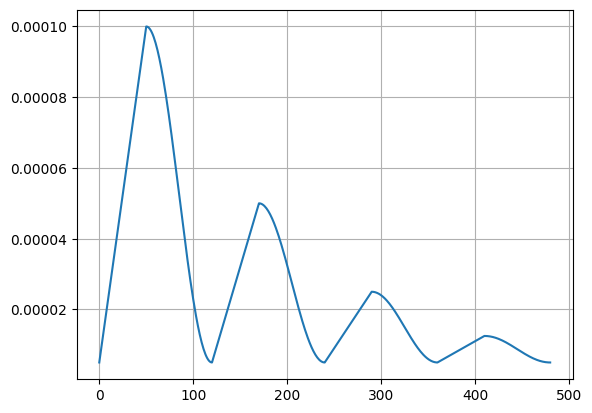

In [5]:
"""
Experimental code
to understand how scheduler work in pytorch
"""

from customscheduler import CosineAnnealingWarmUpRestarts
from torch.optim import SGD, AdamW, RMSprop
import torch.nn as nn

lr = 5e-6
epochs = 15

model = nn.Conv2d(3, 16, 3)
optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-3)
scheduler = CosineAnnealingWarmUpRestarts(optimizer, T_0=epochs*32//4, T_mult=1, eta_max=1e-4,  T_up=50, gamma=0.5)

lr_list = [lr]

for i in range(epochs):
    for j in range(32):
        optimizer.step()
        temp = optimizer.state_dict()
        scheduler.step()
        lr_list.append(scheduler.get_lr()[0])

import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(lr_list)
print(lr_list[-1])

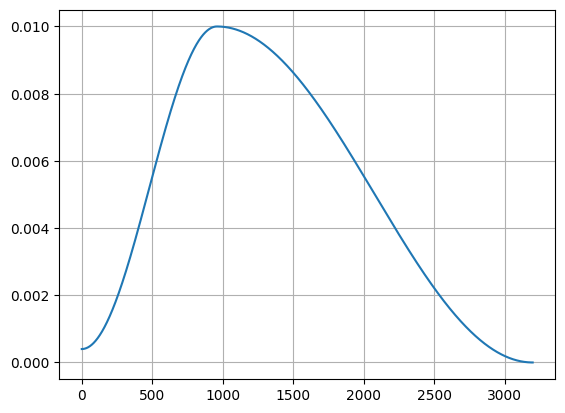

In [18]:
import torch.optim.lr_scheduler as torchscheduler
from torch.optim import SGD, AdamW, RMSprop
from timm import create_model

lr = 0.1
epochs = 100
iter_num = 32
warmup_epoch = 5
warmup_lr = 1e-4

model = create_model("resnet50")
optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-3)
scheduler = torchscheduler.OneCycleLR(optimizer, max_lr=0.01, total_steps=epochs*iter_num)

lr_list = []

for i in range(epochs):
    for j in range(iter_num):
        optimizer.step()
        temp = optimizer.state_dict()
        lr_list.append(temp['param_groups'][0]['lr'])
        scheduler.step()

import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(lr_list, )

[0.0001]


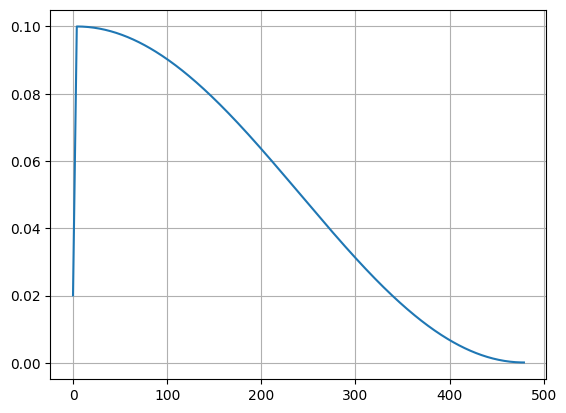

In [7]:
from torch.optim import SGD, AdamW, RMSprop
import torch.nn as nn

lr = 0.0001
epochs = 15
cos_iter = 1

model = nn.Conv2d(3, 16, 3)
optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-3)
scheduler = CosineAnnealingWarmUpRestarts(optimizer, T_0=epochs*32//cos_iter, T_mult=1, eta_max=0.1,  T_up=5, gamma=0.2)

lr_list = []

for i in range(epochs):
    for j in range(32):
        optimizer.step()
        temp = optimizer.state_dict()
        scheduler.step()
        lr_list.append(scheduler.get_lr())

import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(lr_list)
print(lr_list[-1])

/home/ljj0512/.conda/envs/torch/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


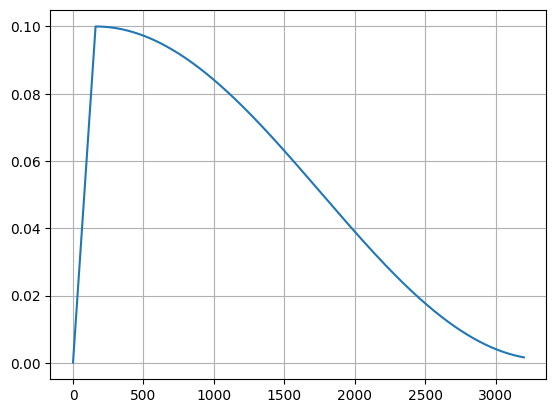

In [17]:
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts, MultiStepLR, StepLR, ExponentialLR, LambdaLR, SequentialLR
from torch.optim import SGD, AdamW, RMSprop
from timm import create_model

lr = 0.1
epochs = 100
warmup_epoch = 5
warmup_lr = 1e-4

model = create_model("resnet50")
optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-3)
main_scheduler = CosineAnnealingLR(optimizer, T_max=epochs*32, eta_min=0.001)

lr_list = []
warmup_iter = warmup_epoch * 32

lr_lambda = lambda e: (e * (lr - warmup_lr) / warmup_iter + warmup_lr) / lr
warmup_scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

scheduler = SequentialLR(optimizer, [warmup_scheduler, main_scheduler], [warmup_iter])

for i in range(epochs):
    for j in range(32):
        optimizer.step()
        temp = optimizer.state_dict()
        lr_list.append(temp['param_groups'][0]['lr'])
        scheduler.step()

import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(lr_list)